In [1]:
import glob

import h5py
import numpy as np

In [2]:
%ll ../..

total 668300
-rwxr-----  1 zaccharie 684237703 avril  8 14:34 Anaconda3-2018.12-Linux-x86_64.sh*
drwxrwxr-x 12 zaccharie      4096 mai    6 13:14 astra-toolbox/
drwxrwxr-x  6 zaccharie      4096 juil.  3 15:55 fastmri-reproducible-benchmark/
drwxr-xr-x 18 zaccharie      4096 mai    9 11:49 fftw-3.3.8/
drwxrwxr-x  9 zaccharie      4096 mai   15 18:13 learned_primal_dual/
drwxr-xr-x  4 zaccharie      4096 juil.  3 15:32 local-machine-setup/
drwxrwxr-x  2 zaccharie      4096 avril 24 16:44 mendeley_papers/
drwxr-xr-x 11 zaccharie      4096 juin  12 10:37 ModOpt/
drwxr-xr-x  4 zaccharie      4096 avril 12 16:08 neurospin-conf-files/
drwxrwxr-x 16 zaccharie      4096 avril 17 17:28 nfft-3.5.0/
drwxr-xr-x 12 zaccharie      4096 mai   15 17:10 odl/
drwxrwxr-x 11 zaccharie      4096 avril 10 12:45 parietal-wiki/
drwxr-xr-x 12 zaccharie      4096 juil.  3 15:46 pysap/
drwxrwxr-x  5 zaccharie      4096 juil.  3 15:34 pysap-astro/
drwxr-xr-x  8 zaccharie      4096 mai    6 11:40 pysap-mri/
-rw-rw

In [3]:
val_path = '../../singlecoil_val/'
test_path = '../../singlecoil_test/'

In [4]:
filenames = glob.glob(test_path + '*')

In [5]:
def from_file_to_mask_and_kspace(filename):
    h5_obj = h5py.File(filename)
    mask = h5_obj['mask'][()]
    kspace = h5_obj['kspace'][()]
    return mask, kspace

In [6]:
shapes = [from_file_to_mask_and_kspace(filename)[1].shape for filename in filenames]

In [7]:
n_slices = np.sum([shape[0] for shape in shapes])
print(n_slices)

3903


In [8]:
def af(mask):
    return len(mask) / sum(mask)

def af_from_file(file):
    mask, _ = from_file_to_mask_and_kspace(file)
    return af(mask)

In [9]:
file_0 = filenames[0]
mask, kspace = from_file_to_mask_and_kspace(file_0)

In [10]:
mask.shape

(372,)

In [11]:
kspace.shape

(33, 640, 372)

In [12]:
import numpy as np

In [13]:
for i in range(36):
    for j in range(372):
        if not mask[j] and np.linalg.norm(kspace[i, :, j]) != 0:
            print(np.linalg.norm(kspace[i, :, j]))
            print('Fail')
            print(i, j)
            break

IndexError: index 33 is out of bounds for axis 0 with size 33

In [14]:
%matplotlib nbagg
import matplotlib.pyplot as plt

In [15]:
plt.rcParams['figure.figsize'] = (9, 5)
plt.rcParams['image.cmap'] = 'gray'

In [16]:
len(mask) / np.sum(mask)

7.75

In [17]:
np.sum(mask)

48

<IPython.core.display.Javascript object>


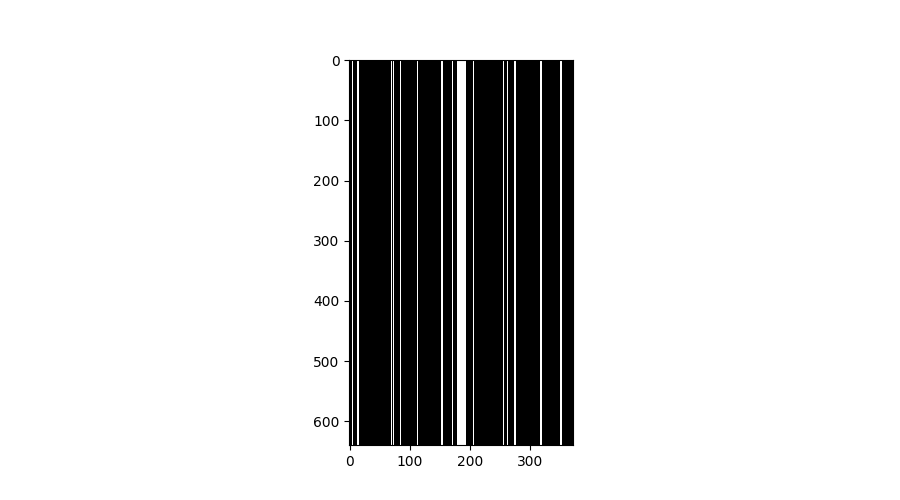

In [19]:
fourier_mask = np.repeat(mask.astype(np.float)[None, :], kspace[0].shape[0], axis=0)
plt.figure()
plt.imshow(fourier_mask)

In [ ]:
plt.figure()
plt.hist(np.where(mask), bins=50)

In [ ]:
afs = [af_from_file(file) for file in filenames]

In [ ]:
plt.figure()
plt.hist(afs)